# Baseline model

## Import packages

In [2]:
pd.read_csv('../raw_data/DF_films_par_acteur.csv')

,Unnamed: 0,0,1,2,3,4,5
0,0,Werner Krauss,Il gabinetto del dottor Caligari,1920,2,18000.0,8811
1,1,Conrad Veidt,Il gabinetto del dottor Caligari,1920,2,18000.0,8811
2,2,Conrad Veidt,Casablanca,1942,11,950000.0,4374761
3,3,Friedrich Feher,Il gabinetto del dottor Caligari,1920,2,18000.0,8811
4,4,Lil Dagover,Il gabinetto del dottor Caligari,1920,2,18000.0,8811
...,...,...,...,...,...,...,...
128789,128789,Penny Johnson Jerald,Il Re Leone,2019,8,260000000.0,1656963790
128790,128790,Eric André,Il Re Leone,2019,8,260000000.0,1656963790
128791,128791,Prokhor Chekhovskoy,Fiksiki: Bolshoy sekret,2017,10,6000000.0,7976551
128792,128792,Jodi Eichelberger,Fiksiki: Bolshoy sekret,2017,10,6000000.0,7976551


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_validate, train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from CinePred.data.utils import one_hot_encode_multiple

## X_train, y_train

In [4]:
data = pd.read_csv('../raw_data/preproc.csv')
data

,Unnamed: 0,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,worlwide_gross_income,currency,total_budget
0,0,tt0010323,Il gabinetto del dottor Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",8811,USD,18000
1,1,tt0011440,Markens grøde,1921,1921-12-02,Drama,107,Norway,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",Christiana Film,"Amund Rydland, Karen Poulsen, Ragna Wettergree...",4272,NOK,29262
2,2,tt0012190,I quattro cavalieri dell'Apocalisse,1921,1923-04-16,"Drama, Romance, War",150,USA,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",9183673,USD,800000
3,3,tt0012349,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",26916,USD,250000
4,4,tt0014624,La donna di Parigi,1923,1927-06-06,"Drama, Romance",82,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",11233,USD,351000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12019,12019,tt9877340,Nalpathiyonnu,2019,2019-11-08,"Drama, Romance",134,India,Lal Jose,P.G. Prageesh,Signature Studios,"Biju Menon, Sharanjith, Nimisha Sajayan, Dhany...",42104,INR,662628
12020,12020,tt9878242,Subharathri,2019,2019-07-06,"Drama, Romance",130,India,Vyasan K.P.,"Vyasan K.P., Vyasan K.P.",Abaam Movies,"Dileep, Anu Sithara, Siddique, Suraj Venjaramo...",105932,INR,397577
12021,12021,tt9886872,Munthiri Monchan,2019,2019-12-06,"Comedy, Romance",130,India,Vijith Nambiar,"Manu Gopal, Meharali Poilungal Ismail",Vishvas Movies,"Manesh Krishnan, Gopika Anil, Salim Kumar, Dev...",2568,INR,397577
12022,12022,tt9900782,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Lokesh Kanagaraj,"Lokesh Kanagaraj, Pon Parthiban",Dream Warrior Pictures,"Karthi, Narain, Ramana, George Maryan, Harish ...",524061,INR,3180616


In [5]:
data.columns

Index(['Unnamed: 0', 'imdb_title_id', 'title', 'year', 'date_published',
       'genre', 'duration', 'country', 'director', 'writer',
       'production_company', 'actors', 'worlwide_gross_income', 'currency',
       'total_budget'],
      dtype='object')

In [20]:
X = data[['year','duration','total_budget',"genre"]]
y = data['worlwide_gross_income']

In [21]:
X = one_hot_encode_multiple(X,"genre")

In [22]:
X.shape

(12024, 25)

(array([  17.,   48.,  263.,  815., 1289., 1896., 2457., 3046., 1912.,
         281.]),
 array([ 2.77258872,  4.67053979,  6.56849086,  8.46644194, 10.36439301,
        12.26234408, 14.16029515, 16.05824622, 17.95619729, 19.85414836,
        21.75209943]),
 <BarContainer object of 10 artists>)

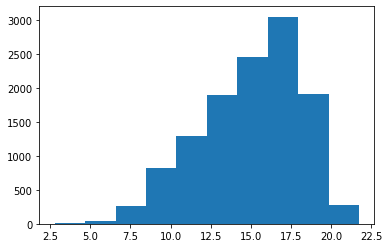

In [15]:
plt.hist(np.log(y))

In [16]:
df1 = pd.read_csv("../raw_data/first_15k_movies.csv")

In [9]:
tscv = TimeSeriesSplit()

In [18]:
df1[['budget','revenue']]

,budget,revenue
0,0,0
1,0,0
2,4000000,4257354
3,21000000,12136938
4,42000,0
...,...,...
9605,0,728903
9606,0,0
9607,1000000,0
9608,1500000,0


In [10]:
liste_model = [LinearRegression(),SGDRegressor(),SVR(),Lasso(),ElasticNet(),Ridge()]

In [11]:
for mod in range(len(liste_model)) : 
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = liste_model[mod]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
    print(f"Model {liste_model[mod]}",mean_absolute_error(y_test,y_pred))

Model LinearRegression() 37697614.29223293
Model SGDRegressor() 1.638815818533528e+22
Model SVR() 46499356.2900828
Model Lasso() 37697609.16395375
Model ElasticNet() 36158146.18013285
Model Ridge() 37689796.00443379


/home/oscartouze/.pyenv/versions/3.8.12/envs/cinepred/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.29878e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/oscartouze/.pyenv/versions/3.8.12/envs/cinepred/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.2215e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/oscartouze/.pyenv/versions/3.8.12/envs/cinepred/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.79934e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/oscartouze/.pyenv/versions/3.8.12/envs/cinepred/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.47184e-19): result may not be ac